# Using Machine Learning to predict Financial Crises

**Author:** [Chris Reimann](https://github.com/chrisreimann)<br>
**Date created:** 2023/07/28<br>
**Last modified:** 2023/07/28<br>
**Description:** This notebook runs the experiments of the paper "Using Machine Learning to predict Financial Crises: An Evaluation of different Learning Algorithms for Early Warning Models".

## Setup
Load the latest code from the [repository](https://github.com/chrisreimann/financialCrisisML) and import it into the virtual machine.

In [1]:
from prepareData import Data
from doExperiment import Experiment
import pandas as pd

## Load Data
Construct datasets using specified indicator variables from the [MacroHistory](https://www.macrohistory.net/database/) database. Nominal values of local currencies are transformed to GDP-ratios, while growth rates are computed for percentages and index values. For additional details see Chapter 2.3 of the paper.

In [2]:
# Define Indicator Sets
iv_macro = ["rconsbarro", "iy", "money", "xrusd", "gdp", "cpi", "ca"]
iv_credit = ["tloans", "debtServ", "yieldCurve", "ltd", "debtgdp", "globaltloans", "globalyieldCurve"]
iv_ca = iv_credit + ["hpnom"]
iv_all = iv_macro + iv_ca

# Construct Datasets
df_macro = Data(indicators = iv_macro, crisisData = "MacroHistory").getReady("Macro")
df_credit = Data(indicators = iv_credit, crisisData = "MacroHistory").getReady("Credit")
df_ca = Data(indicators = iv_ca, crisisData = "MacroHistory").getReady("Credit & Asset")
df_all = Data(indicators = iv_all, crisisData = "MacroHistory").getReady("All")

Macro: The final dataset contains 1591 observations with 63 distinct crisis events.
Credit: The final dataset contains 1373 observations with 60 distinct crisis events.
Credit & Asset: The final dataset contains 1159 observations with 46 distinct crisis events.
All: The final dataset contains 1101 observations with 41 distinct crisis events.


## Construct Experiments
Specify models to be tested. Available models are Logit, KNeighbors, RandomForest, ExtraTrees, SVM and NeuralNet.

In [3]:
# Specify Models to be tested
models = ["Logit", "KNeighbors", "RandomForest", "ExtraTrees", "SVM", "NeuralNet"]

# Define Experiments for all Indicator Sets.
ex_macroIS = Experiment(df_macro, models, "InSample")
ex_creditIS = Experiment(df_credit, models, "InSample")
ex_caIS = Experiment(df_ca, models, "InSample")
ex_allIS = Experiment(df_all, models, "InSample")

ex_macro = Experiment(df_macro, models, "CrossVal")
ex_credit = Experiment(df_credit, models, "CrossVal")
ex_ca = Experiment(df_ca, models, "CrossVal")
ex_all = Experiment(df_all, models, "CrossVal")

## Run Experiments
### In-Sample
Compute ROC values for all models trained and tested on the whole dataset.

In [4]:
ex_macroIS.run(disableTqdm = True)
ex_creditIS.run(disableTqdm = True)
ex_caIS.run(disableTqdm = True)
ex_allIS.run(disableTqdm = True)

resIS = pd.concat([ex_macroIS.auc, ex_creditIS.auc, ex_caIS.auc, ex_allIS.auc], axis = 0)
resIS

,Set,Model,AUC
0,Macro,KNeighbors,1.000000
1,Macro,RandomForest,0.981277
2,Macro,ExtraTrees,0.833469
3,Macro,SVM,0.759257
4,Macro,NeuralNet,0.713687
5,Macro,Logit,0.707710
6,Macro,Random Assignment,0.500000
0,Credit,KNeighbors,1.000000
1,Credit,RandomForest,0.983538
2,Credit,ExtraTrees,0.934343


### Out-of-Sample
Run experiments in cross-validation setting.

Macro: Random Assignment:   0%|          | 0/2 [00:00<?, ?it/s]

Macro: Logit:   0%|          | 0/2 [00:00<?, ?it/s]

Macro: KNeighbors:   0%|          | 0/2 [00:00<?, ?it/s]

Macro: RandomForest:   0%|          | 0/2 [00:00<?, ?it/s]

Macro: ExtraTrees:   0%|          | 0/2 [00:00<?, ?it/s]

Macro: SVM:   0%|          | 0/2 [00:00<?, ?it/s]

Macro: NeuralNet:   0%|          | 0/2 [00:00<?, ?it/s]

Credit: Random Assignment:   0%|          | 0/2 [00:00<?, ?it/s]

Credit: Logit:   0%|          | 0/2 [00:00<?, ?it/s]

Credit: KNeighbors:   0%|          | 0/2 [00:00<?, ?it/s]

Credit: RandomForest:   0%|          | 0/2 [00:00<?, ?it/s]

Credit: ExtraTrees:   0%|          | 0/2 [00:00<?, ?it/s]

Credit: SVM:   0%|          | 0/2 [00:00<?, ?it/s]

Credit: NeuralNet:   0%|          | 0/2 [00:00<?, ?it/s]

Credit & Asset: Random Assignment:   0%|          | 0/2 [00:00<?, ?it/s]

Credit & Asset: Logit:   0%|          | 0/2 [00:00<?, ?it/s]

Credit & Asset: KNeighbors:   0%|          | 0/2 [00:00<?, ?it/s]

Credit & Asset: RandomForest:   0%|          | 0/2 [00:00<?, ?it/s]

Credit & Asset: ExtraTrees:   0%|          | 0/2 [00:00<?, ?it/s]

Credit & Asset: SVM:   0%|          | 0/2 [00:00<?, ?it/s]

Credit & Asset: NeuralNet:   0%|          | 0/2 [00:00<?, ?it/s]

All: Random Assignment:   0%|          | 0/2 [00:00<?, ?it/s]

All: Logit:   0%|          | 0/2 [00:00<?, ?it/s]

All: KNeighbors:   0%|          | 0/2 [00:00<?, ?it/s]

All: RandomForest:   0%|          | 0/2 [00:00<?, ?it/s]

All: ExtraTrees:   0%|          | 0/2 [00:00<?, ?it/s]

All: SVM:   0%|          | 0/2 [00:00<?, ?it/s]

All: NeuralNet:   0%|          | 0/2 [00:00<?, ?it/s]

,Set,Model,AUC
0,Macro,RandomForest,0.708428
1,Macro,Logit,0.678937
2,Macro,NeuralNet,0.661045
3,Macro,ExtraTrees,0.643101
4,Macro,KNeighbors,0.612661
5,Macro,SVM,0.530819
6,Macro,Random Assignment,0.500000
0,Credit,ExtraTrees,0.837239
1,Credit,RandomForest,0.816213
2,Credit,KNeighbors,0.806163


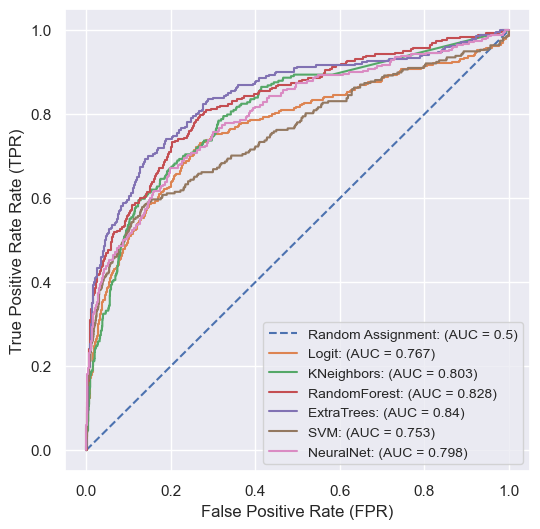

In [10]:
n = 2 # Specify number of cross-validation iterations

ex_macro.run(n)
ex_credit.run(n)
ex_ca.run(n)
ex_all.run(n)

resCrossVal = pd.concat([ex_macro.auc, ex_credit.auc, ex_ca.auc, ex_all.auc])
ex_all.rocGraph()
resCrossVal